# Índice

- [Visão Geral do Projeto](#geral)
- [Sobre este projeto e bibliotecas usadas](#sobre)
- [Parte 01 - Descrição dos conjunto de dado através de estatísticas e gráficos](#parte01)
    - [O dataset 'Tips'](#tips)
    - [Importando as Bibliotecas necessárias](#importando)
    - [Descrição dos Dados](#descrição)
    - [Dicionário](#dicionario)
    - [Perguntas de partida e hipóteses](#perguntas)
    - [Estatísticas do Dataset](#estatisticas)
    - [Visualizando as variáveis categóricas no dataset](#visucat)
    - [Recapitulação](#recap01)
-[Análise da relação entre o valor total da conta e o valor da gorjeta através de regressão](#parte02)
    - [Identificando relação entre Valor da Conta e Gorgeta](#identificando)
    - [Recapitulação](#recap02)
- [Investigação das relações entre todas as variáveis do conjunto de dados](#parte03)
    - [Gênero e fumante no conjunto de dados](#genfum)
    - [A quantidade de pessoas tem influência?](#quantpess)
    - [Conclusões](#conclusões)
- [Referências](#referências)

<a id="geral"></a>
## Visão Geral do Projeto:

Este projeto de análise de dados explora o conjunto de dados de gorjetas, utilizando as bibliotecas Python seaborn e jupyter. O projeto é dividido em três partes: 
1. [Descrição do conjunto de dados através de estatísticas e gráficos.](#parte01)

2. [Análise da relação entre o valor total da conta e o valor da gorjeta através de regressão.](#parte02)

3. [Investigação das relações entre todas as variáveis do conjunto de dados.](#parte03)

A análise exploratória de dados é uma fase da análise de dados que envolve a exploração do conjunto de dados através de diversas questões e visualizações. A AED pode ser usado para detectar erros, verificar suposições, determinar relações entre variáveis e selecionar modelos apropriados. É uma abordagem para analisar conjuntos de dados e resumir suas principais características, muitas vezes com métodos visuais. A AED foi desenvolvida por John Tukey para incentivar os estatísticos a explorar os dados e formular novas hipóteses.

---

<a id="sobre"></a>
### Sobre este Projeto e Bibliotecas Python:

Este projeto foi desenvolvido usando as bibliotecas seaborn, pandas e matplotlib.pyplot. O Seaborn é uma biblioteca de visualização de dados Python para criar gráficos estatísticos. O Pandas fornece ferramentas de análise de dados e é projetado para trabalhar com dados tabulares. O Jupyter Notebook permite criar e compartilhar documentos que contêm código ativo, equações, visualizações e texto narrativo.

---


<a id="parte01"></a>
# 1. Descrição do conjunto de dados através de estatísticas e gráficos

A primeira parte do projeto tem como objetivo iniciar a análise exploratória de dados, fornecendo um resumo das principais características do conjunto de dados de gorjetas usando estatísticas e gráficos. John Tukey promoveu o uso do resumo de cinco números de dados numéricos, incluindo os valores máximo e mínimo, a mediana e os quartis, que serão analisados nesta seção.


<a id="tips"></a>
### O Dataset 'Tips'

O conjunto de dados "Tips" está disponível no repositório de datasets do [Atlântico Academy](https://github.com/atlantico-academy/datasets/blob/main/tips.csv). Ele contém informações sobre 244 gorjetas registradas por um garçom durante alguns meses em um restaurante. As variáveis incluem o valor da gorjeta, o valor da conta, o sexo do cliente, a presença de fumantes, o dia da semana, a hora do dia e o tamanho do grupo. O conjunto de dados segue o formato "tidy", onde cada variável forma uma coluna e cada observação forma uma linha. É importante notar que este é um conjunto de dados pequeno e limitado, não sendo adequado para tirar conclusões generalizadas sobre práticas de gorjeta.

---

<a id="importando"></a>
### Importando as Bibliotecas Necessárias

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, threshold=5, suppress=True)
pd.options.display.max_rows=8

## Leitura do Conjunto de Dados

<a id="descrição"></a>
### Descrição dos Dados

Este conjunto de dados reúne informações detalhadas sobre as gorjetas recebidas por um garçom durante um período de alguns meses em um restaurante. O registro meticuloso do garçom oferece uma visão valiosa sobre os fatores que podem influenciar o valor das gorjetas, como o dia da semana, o horário da refeição, o valor total da conta e o número de pessoas na mesa.


In [20]:
df = pd.read_csv("../data/raw/tips_data.csv")
print("Linhas iniciais: \n\n", df.head(3))
print("\nLinhas finais: \n\n", df.tail(3))


Linhas iniciais: 

    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

Linhas finais: 

      total_bill   tip     sex smoker   day    time  size
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


<a id="dicionario"></a>
### Dicionário de Dados

In [11]:
dicionario = pd.read_csv("../data/external/tips_dictionary.csv")
print(dicionario, "\n")

     variavel                      descricao          tipo   subtipo
0  total_bill      valor da conta em dólares  quantitativa  contínua
1         tip    valor da gorgeta em dólares  quantitativa  contínua
2         sex     sexo de quem pagou a conta   qualitativa   nominal
3      smoker      Se havia fumantes na mesa   qualitativa   nominal
4         day                  dia da semana   qualitativa   ordinal
5        time                    hora do dia   qualitativa   nominal
6        size  quantidade de pessoas na mesa  quantitativa  discreta 



O conjunto de dados Tips contém três colunas numéricas (total_bill, tip, size) e quatro colunas categóricas (smoker, sex, day, time). As colunas categóricas foram lidas como objetos, mas podem ser convertidas para o tipo category para economizar memória. As variáveis time e day são categóricas, representando duas (dinner, lunch) e quatro (Thur, Fri, Sat, Sun) categorias respectivamente.

<a id="perguntas"></a>
### Perguntas de partida e hipóteses

*  O sexo de quem paga a conta tem influência no valor da gorgeta?
*  Existe relação entre o valor da conta e o da gorgeta?
*  Fumantes costumam dar gorgetas maiores?
*  O dia da semana ou o horário das refeições podem afetar o valor das gorgetas?
*  Mesas com mais pessoas costumam dar gorgetas maiores?
*  Qual o perfil dos clientes que frequentam o restaurante?
*  Quais os dias e horários com o maior número de clientes?

### Convertendo variáveis para o tipo category:

In [23]:
df['sex']=df['sex'].astype('category') 
df['smoker']=df['smoker'].astype('category') 
df['day']=df['day'].astype('category')
df['time']=df['time'].astype('category')
print(*df.dtypes)

float64 float64 category category category category int64


### Verificando se existem valores ausentes ou N/A

Verificaremos se existem valores ausentes ou N/A no conjunto de dados usando a função isna() e somando os valores booleanos True ou False para obter uma contagem de quaisquer valores ausentes, que neste caso é zero.

In [56]:
print(*df.isna().any())

False False False False False False False


<a id="estatisticas"></a>
## Estatísticas do Dataset

Vamos calcular algumas estatísticas descritivas para entender melhor a distribuição dos nossos dados. Posteriormente faremos visualizações das distribuições.

In [24]:
print("Tabela de características da variável categórica:\n")
df.describe(include=['category'])

Tabela de características da variável categórica:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


* Sex: Existem 157 clientes do sexo masculino e 87 clientes do sexo feminino.

* Smoker: Existe um maior número de não fumantes no conjunto de dados, com 151 de um total de 244, 93 são fumantes.

* Time: São 176 jantares e 68 almoços.

* Day: Sábado é o dia mais movimentado.

In [26]:
print("Tabela de características das variáveis numéricas:\n")
df.describe()

Tabela de características das variáveis numéricas:



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


A tabela gerada acima mostra as estatísticas de resumo para as variáveis total_bill, tip e size. Elas fornecem informações sobre a tendência central e dispersão dos dados.

In [36]:
print(f"O valor médio da conta é ${df['total_bill'].mean():.2f} enquanto a mediana é ${df['total_bill'].quantile(q=0.5):.2f}.\n")

O valor médio da conta é $ 19.79 enquanto a mediana é $ 17.80.



In [37]:
print(f"O valor médio da gorgeta é ${df['tip'].mean():.2f} enquanto a mediana é ${df['tip'].quantile(q=0.5):.2f}.\n")

O valor médio da gorgeta é $ 3.00 enquanto a mediana é $ 2.90.



A mediana do valor da conta é menor do que a média por mais ou menos 2 dolares enquanto a mediana do valor da gorgeta é menor que a média em 10 centavos.

### Variância e Desvio Padrão

In [50]:
print(f"A variância e os desvios padrão dos valores da conta são ${df['total_bill'].var():.2f} e ${df['total_bill'].std():.2f}.")
print(f"A variância e os desvios padrão dos valores das gorjetas são ${df['tip'].var():.2f} e ${df['tip'].std():.2f}.")
print(f"A variância e os desvios padrão do total de pessoas na mesa são ${df['size'].var():.2f} e ${df['size'].std():.2f}.")

A variância e os desvios padrão dos valores da conta são $79.25 e $8.90.
A variância e os desvios padrão dos valores das gorjetas são $1.91 e $1.38.
A variância e os desvios padrão do total de pessoas na mesa são $0.90 e $0.95.


### O Alcance dos Dados

In [48]:
print(f"O valor mínimo da conta é $ {df['total_bill'].min()} enquanto o valor máximo da conta é ${df['total_bill'].max()} dando uma variação de ${df['total_bill'].max() - df['total_bill'].min()}.")
print(f"O valor mínimo da gorjeta é {df['tip'].min()} enquanto o valor máximo da gorjeta é ${df['tip'].max()} dando uma variação de ${df['tip'].max() - df['tip'].min():.2f}.")
print(f"O número de pessoas em cada grupo varia entre {df['size'].min()} a {df['size'].max()} pessoas.")

O valor mínimo da conta é $ 3.07 enquanto o valor máximo da conta é $ 50.81 dando uma variação de $ 47.74
O valor mínimo da gorjeta é 1.0 enquanto o valor máximo da gorjeta é $ 10.0 dando uma variação de $ 9.00
O número de pessoas em cada grupo varia entre 1 a 6 pessoas


### O Interquantil

In [52]:
print(f"A mediana da conta é ${df['total_bill'].quantile(q=0.5):.2f} e a mediana da gorgeta é ${df['tip'].quantile(q=0.5):.2f}.")
print(f"O IQR do total da conta está entre ${df['total_bill'].quantile(q=0.25):.2f} e ${df['total_bill'].quantile(q=0.75):.2f}.")
print(f"O IQR da gorgeta varia entre ${df['tip'].quantile(q=0.25):.2f} e ${df['tip'].quantile(q=0.75):.2f}.")

A mediana da conta é $17.80 e a mediana da gorgeta é $2.90.
O IQR do total da conta está entre $13.35 e $24.13.
O IQR da gorgeta varia entre $2.00 e $3.56.


<a id="visucat"></a>
## Visualizando as variáveis categóricas no dataset

O dataset contém informações como valor da conta, valor da gorjeta, sexo do cliente, se é fumante, dia da semana e horário da refeição. 
A análise exploratória inicial revela que a maioria dos clientes são homens, não fumantes e preferem jantar aos sábados. 
As distribuições de valores de conta e gorjeta são assimétricas, com valores de mediana menores que as médias, indicando a presença de valores mais altos que influenciam as médias.
A análise também inclui a criação de novas variáveis, como a porcentagem da gorjeta em relação à conta e o valor da conta por pessoa.

In [63]:
ordem_dias=["Thur", "Fri", "Sat","Sun"] # a ordem a ser mostrada nos plots

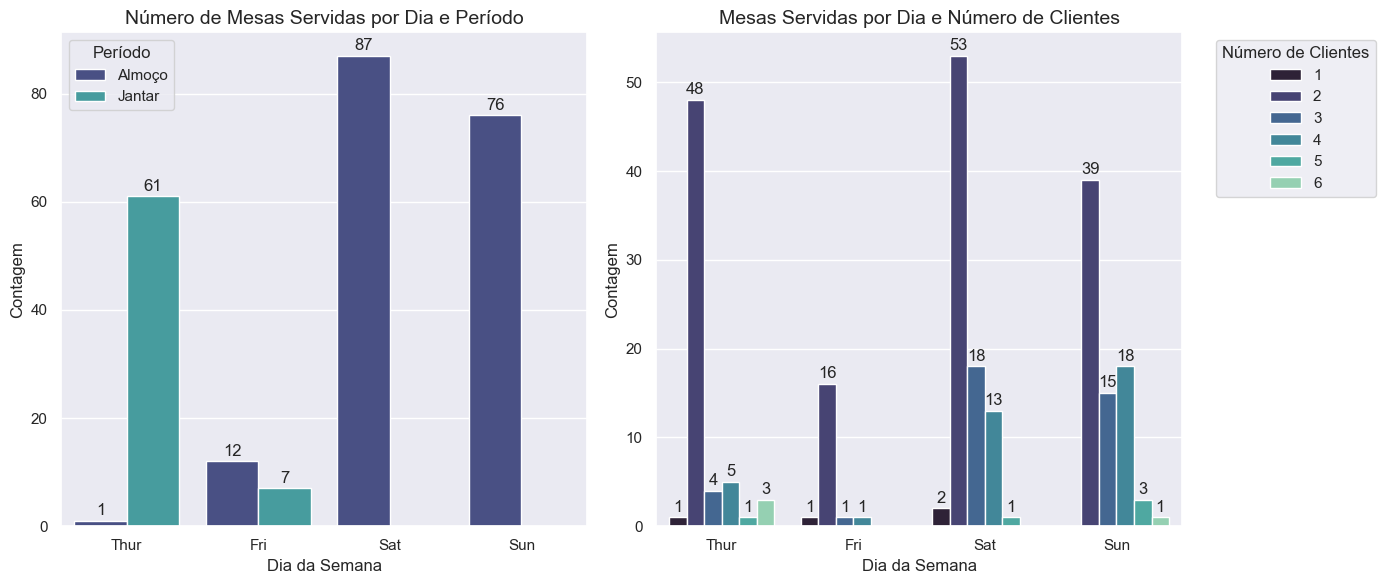

In [125]:
sns.set(style="darkgrid", palette="muted")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

sns.countplot(x="day", hue="size", data=df, ax=axes[1], order=ordem_dias,
              palette="mako")  # Paleta mais clara e variada
axes[1].set_title("Mesas Servidas por Dia e Número de Clientes", fontsize=14)
axes[1].set_xlabel("Dia da Semana", fontsize=12)
axes[1].set_ylabel("Contagem", fontsize=12)
axes[1].legend(title="Número de Clientes", bbox_to_anchor=(1.05, 1), loc='upper left')  

sns.countplot(x="day", hue="time", data=df, ax=axes[0], order=ordem_dias,
              palette="mako")  
axes[0].set_title("Número de Mesas Servidas por Dia e Período", fontsize=14)
axes[0].set_xlabel("Dia da Semana", fontsize=12)
axes[0].set_ylabel("Contagem", fontsize=12)
axes[0].legend(title="Período", labels=["Almoço", "Jantar"])  

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=2)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=2)


plt.tight_layout()

plt.show()


* Sextas-feiras são os dias com menos clientes e sábados são os mais movimentados.
* A quantidade mais comum de clientes na mesa são de 2 pessoas, existem poucas mesas com apenas um ou com mais de quatro clientes.

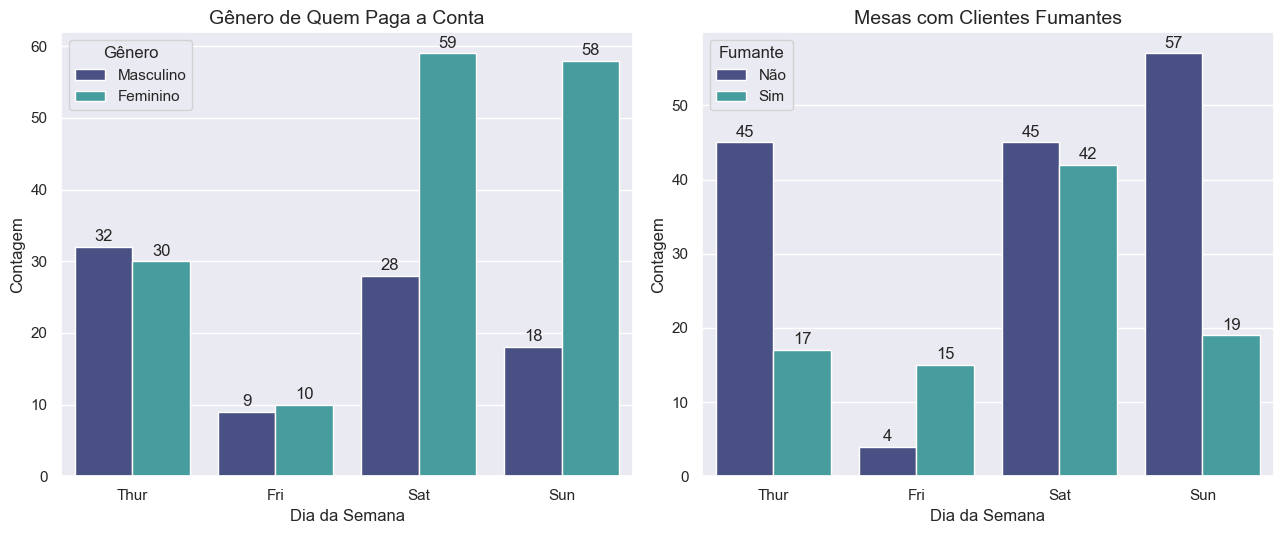

In [126]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(13, 5.5))

sns.countplot(x="day", hue="sex", data=df, ax=axes[0],
              order=ordem_dia, palette="mako")  
axes[0].set_title("Gênero de Quem Paga a Conta", fontsize=14)
axes[0].set_xlabel("Dia da Semana", fontsize=12)
axes[0].set_ylabel("Contagem", fontsize=12)
axes[0].legend(title="Gênero", labels=["Masculino", "Feminino"]) 

sns.countplot(x="day", hue="smoker", data=df, ax=axes[1],
              order=ordem_dia, palette="mako")
axes[1].set_title("Mesas com Clientes Fumantes", fontsize=14)
axes[1].set_xlabel("Dia da Semana", fontsize=12)
axes[1].set_ylabel("Contagem", fontsize=12)
axes[1].legend(title="Fumante", labels=["Não", "Sim"], loc="upper left")

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=2)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=2)

plt.tight_layout()
plt.show()

* O número de clientes homens e mulheres é semelhante durante a semana, mas aumenta significativamente para homens no fim de semana.
* Fumantes são minoria, especialmente às quintas e domingos. Sextas-feiras têm menos clientes, mas a maioria fuma.
* A proporção de homens e mulheres é equilibrada no almoço, mas exitem mais homens em geral.

### Histogramas relacionados ao Valor Total da Conta e Valor da Gorjeta

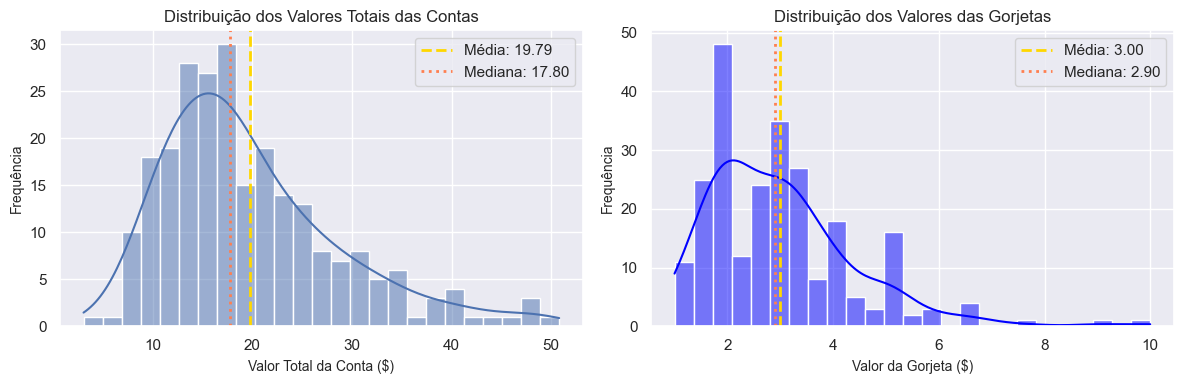

In [130]:
sns.set(style="darkgrid")

# Criar subplots 1x2
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['total_bill'], kde=True, ax=axes[0], palette="mako", bins=25)
axes[0].axvline(df['total_bill'].mean(), color='gold', linewidth=2, linestyle="--", label=f"Média: {df['total_bill'].mean():.2f}")
axes[0].axvline(df['total_bill'].median(), color='coral', linewidth=2, linestyle=":", label=f"Mediana: {df['total_bill'].median():.2f}")  # Cor da mediana alterada
axes[0].set_title("Distribuição dos Valores Totais das Contas", fontsize=12)  # Título mais descritivo
axes[0].set_xlabel("Valor Total da Conta ($)", fontsize=10)
axes[0].set_ylabel("Frequência", fontsize=10)
axes[0].legend()


sns.histplot(df['tip'], kde=True, ax=axes[1], color="blue", bins=25)  # Cor alterada para verde claro
axes[1].axvline(df['tip'].mean(), color='gold', linewidth=2, linestyle="--", label=f"Média: {df['tip'].mean():.2f}")
axes[1].axvline(df['tip'].median(), color='coral', linewidth=2, linestyle=":", label=f"Mediana: {df['tip'].median():.2f}")  # Cor da mediana alterada
axes[1].set_title("Distribuição dos Valores das Gorjetas", fontsize=12)  # Título mais descritivo
axes[1].set_xlabel("Valor da Gorjeta ($)", fontsize=10)
axes[1].set_ylabel("Frequência", fontsize=10)
axes[1].legend()

plt.tight_layout()
plt.show()

Os histogramas mostram que a maioria das contas fica entre 10 e 30 dólares, com um pico por volta de 16 dólares. A distribuição tem um único pico com o número padrão de intervalos, mas é esperado que surjam mais picos ao aumentar esse número. A média (linha amarela) é uns 2 dólares maior que a mediana (linha azul), o que indica uma distribuição assimétrica. Já a média e a mediana das gorjetas são bem próximas, com a distribuição levemente assimétrica para a direita e concentrada entre 2 e 4 dólares, com picos em 2,50 e 3,50 dólares.

### Bloxplot dos Valores Totais das contas e dos Valores das Gorgetas

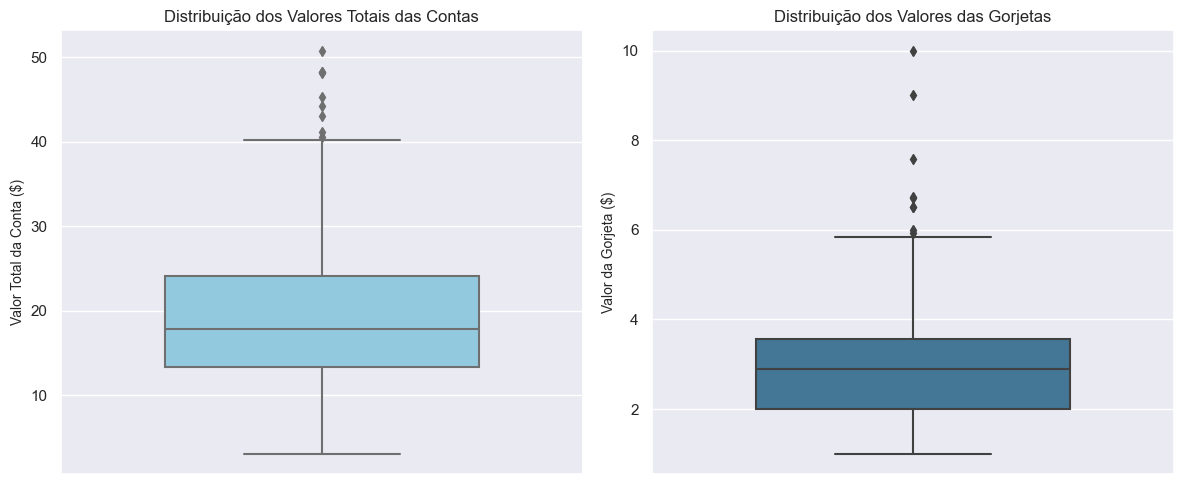

In [136]:
sns.set(style="darkgrid")  


fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

sns.boxplot(y=df['total_bill'], ax=axes[0], color="skyblue", width=0.6)  
axes[0].set_title("Distribuição dos Valores Totais das Contas", fontsize=12)
axes[0].set_ylabel("Valor Total da Conta ($)", fontsize=10)
axes[0].yaxis.grid(True)

sns.boxplot(y=df['tip'], ax=axes[1], palette="mako", width=0.6)  
axes[1].set_title("Distribuição dos Valores das Gorjetas", fontsize=12)
axes[1].set_ylabel("Valor da Gorjeta ($)", fontsize=10)
axes[1].yaxis.grid(True)

plt.tight_layout()
plt.show()

Os diagramas de caixa confirmam informações dos gráficos anteriores sobre a distribuição de valores de contas e gorjetas. A mediana das contas é 18 dólares e das gorjetas, mais de 3 dólares. Valores acima de 40 e 6 dólares, respectivamente, são outliers.

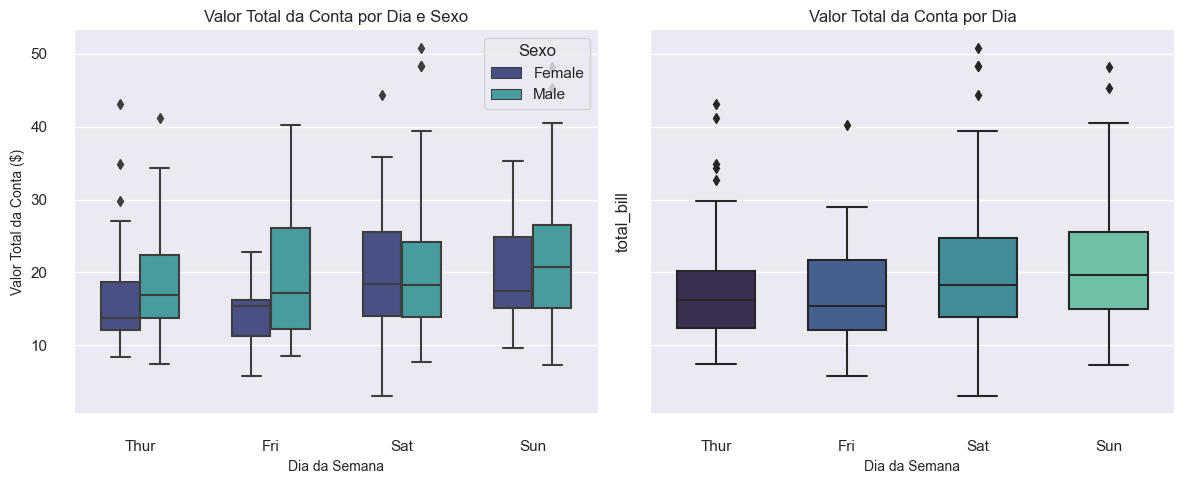

In [146]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # Aumentada a altura e compartilhado o eixo Y

sns.boxplot(x="day", y="total_bill", data=df, hue="sex", palette="mako", order=ordem_dia, ax=axes[0], width=0.6)
axes[0].set_title("Valor Total da Conta por Dia e Sexo", fontsize=12)
axes[0].set_xlabel("Dia da Semana", fontsize=10)
axes[0].set_ylabel("Valor Total da Conta ($)", fontsize=10)
axes[0].legend(title="Sexo", loc='upper right')

sns.boxplot(x="day", y="total_bill", data=df, order=ordem_dia, palette="mako", ax=axes[1], color='lightblue', width=0.6)
axes[1].set_title("Valor Total da Conta por Dia", fontsize=12)
axes[1].set_xlabel("Dia da Semana", fontsize=10)

sns.despine(offset=10, trim=True)
plt.tight_layout()

plt.show()

Ao analisar os valores totais das contas por dia, notamos que os gastos aumentam nos finais de semana, sendo mais baixos às sextas-feiras. Quando discriminados por sexo, os homens geralmente pagam contas mais altas e com maior variação do que as mulheres. O sábado parece ser o único dia em que as contas medianas de homens e mulheres são semelhantes, embora haja uma maior dispersão nos valores das contas pagas por homens.

### Valores únicos

In [154]:
# Contagem de valores únicos (com formatação mais clara)
unico_bills = len(df['total_bill'].unique())
unico_tips = len(df['tip'].unique())
print(f"Existem {unico_bills} valores únicos de contas e {unico_tips} valores únicos de gorjetas.")

# Moda da gorjeta (usando pandas)
tip_contagem = df['tip'].value_counts()
moda_valores = tip_contagem[tip_contagem == tip_contagem.max()].index.tolist()  # Encontra todas as modas

if len(moda_valores) > 1:
    print("Há múltiplas modas para as gorjetas:")
    for value in moda_valores:
        print(f"- R$ {value:.2f}")  # Mostra as modas
else:
    print(f"A gorjeta mais comum é $ {moda_valores[0]:.2f} (ocorre {tip_contagem.max()} vezes)")




Existem 229 valores únicos de contas e 123 valores únicos de gorjetas.
A gorjeta mais comum é $ 2.00 (ocorre 33 vezes)


### Gráficos de resumo do dataset

Vou finalizar a parte 1 com alguns gráficos que resumem o conjunto de dados. Esses gráficos podem ajudar a identificar a relação entre o valor total da conta e a gorjeta, que será examinada mais de perto na Parte 2


Relações entre valor da conta, gorjeta, tamanho da mesa por gênero do cliente



/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


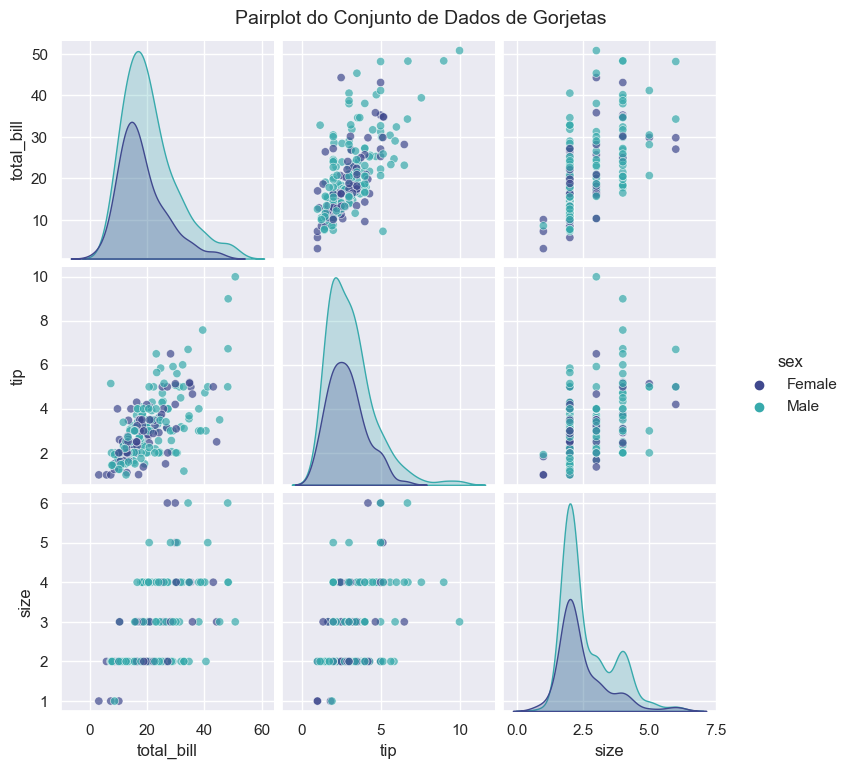

In [166]:

print("\nRelações entre valor da conta, gorjeta, tamanho da mesa por gênero do cliente\n")

sns.pairplot(df[['total_bill', 'tip', 'sex', 'smoker', 'size']], 
             hue="sex", palette="mako",
             diag_kind="kde", plot_kws=dict(alpha=0.7)) 


plt.suptitle("Pairplot do Conjunto de Dados de Gorjetas", y=1.02, fontsize=14)
plt.show()


Pairplot: Relações entre valor da conta, gorjeta, tamanho da mesa, sexo e fumante



/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


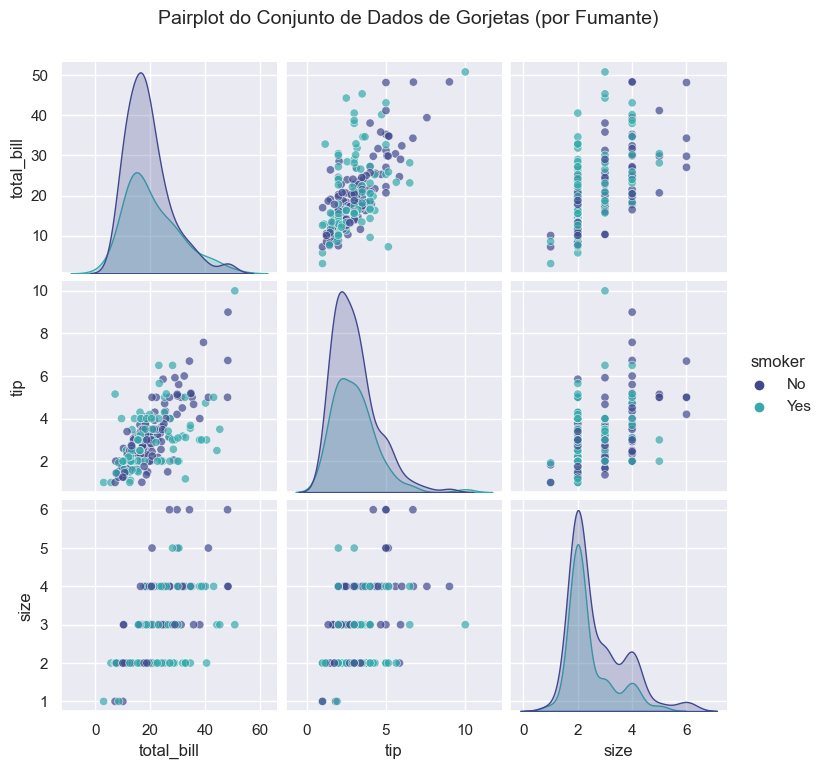

In [168]:
print("\nPairplot: Relações entre valor da conta, gorjeta, tamanho da mesa, sexo e fumante\n")

# Paleta de cores personalizada
smoker_pal = ["lightgreen", "salmon"]  # Cores claras para "Não" e "Sim"

# Pairplot com personalizações
sns.pairplot(df[['total_bill', 'tip', 'sex', 'smoker', 'size']], 
             hue="smoker", palette="mako",
             diag_kind="kde", plot_kws=dict(alpha=0.7)) 

# Títulos dos eixos
plt.suptitle("Pairplot do Conjunto de Dados de Gorjetas (por Fumante)", y=1.02, fontsize=14)
plt.subplots_adjust(top=0.95)

# Exibir o gráfico
plt.show()

<a id="recap01"></a>
### Recapitulação

Esta primeira parte teve como objetivo descrever as variáveis do conjunto de dados de gorjetas através de estatísticas e gráficos. Após carregar e verificar os dados, utilizei o Pandas para analisar variáveis categóricas (contagem, valores únicos, frequência) e quantitativas (média, mediana, desvio padrão, etc.). 
Visualizei a distribuição dos dados com gráficos do Seaborn, como boxplots e histogramas com estimativas de densidade.

---

<a id="parte02"></a>
# 2. Análise da relação entre o valor total da conta e o valor da gorjeta através de regressão

Nesta seção, analisarei a relação entre o valor total da conta e o valor da gorjeta utilizando regressão.

<a id="identificando"></a>
### Identificando relação entre Valor da Conta e Gorgeta

O gráfico de dispersão abaixo visualiza a relação entre o valor total da conta e a gorjeta. As estatísticas de correlação quantificarão a força e a direção dessa relação. O gráfico mostra a distribuição conjunta das duas variáveis, onde cada ponto representa uma observação no conjunto de dados. Cada ponto representa uma conta e a gorjeta correspondente.

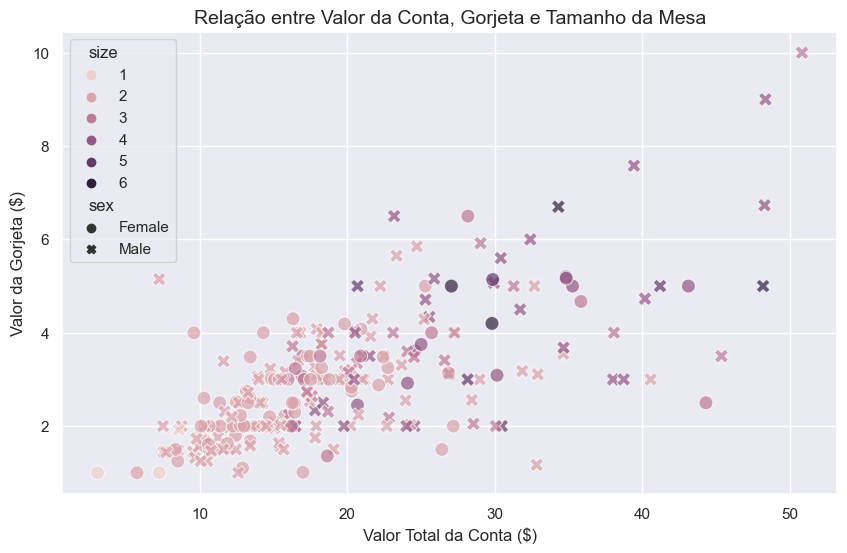

In [225]:
sns.set(style="darkgrid")


plt.figure(figsize=(10, 6))  
sns.scatterplot(x=df['total_bill'],y=df['tip'], hue=df["size"], style=df["sex"], s=100, alpha=0.7)
# add title
plt.title("Relação entre Valor da Conta, Gorjeta e Tamanho da Mesa", fontsize=14)
plt.xlabel("Valor Total da Conta ($)", fontsize=12)
plt.ylabel("Valor da Gorjeta ($)", fontsize=12)

plt.show()


O gráfico de dispersão mostra uma relação linear positiva entre o valor da conta e a gorjeta, com os pontos formando uma linha diagonal. A gorjeta tende a aumentar com o valor da conta, como esperado, mas há exceções. Algumas gorjetas são altas para contas baixas e outras são baixas para contas altas, especialmente nos pontos no canto inferior direito do gráfico, abaixo da linha imaginária.

### Correlação e Covariância

In [190]:
numeric_cols = ['total_bill', 'tip', 'size']  # Filtra apenas as colunas numéricas
cov_matrix = df[numeric_cols].cov()
corr_matrix = df[numeric_cols].corr()

print("\nCovariâncias entre as variáveis numéricas:\n")
print(cov_matrix.round(2))  

print("\nCorrelações entre as variáveis numéricas:\n")
print(corr_matrix.round(2))


Covariâncias entre as variáveis numéricas:

            total_bill   tip  size
total_bill       79.25  8.32  5.07
tip               8.32  1.91  0.64
size              5.07  0.64  0.90

Correlações entre as variáveis numéricas:

            total_bill   tip  size
total_bill        1.00  0.68  0.60
tip               0.68  1.00  0.49
size              0.60  0.49  1.00


In [194]:
covariancia = df['total_bill'].cov(df['tip'])
correlacao = df['total_bill'].corr(df['tip'])

print(f"Covariância entre valor total da conta e gorjeta: {covariancia:.4f}")
print(f"Correlação entre valor total da conta e gorjeta: {correlacao:.4f}\n")


Covariância entre valor total da conta e gorjeta: 8.3235
Correlação entre valor total da conta e gorjeta: 0.6757



A correlação entre o valor da conta e a gorjeta é positiva e alta (0,67), indicando uma relação forte, porém não exclusiva. O tamanho da mesa também influencia, com correlação de 0,49. É importante lembrar que correlação não implica causalidade, podendo haver outros fatores envolvidos, como o tamanho da mesa ou o dia da semana.

Vou ajustar modelos de regressão da gorjeta em função do valor da conta. Primeiro, um modelo de regressão simples será plotado sobre um gráfico de dispersão das duas variáveis. 

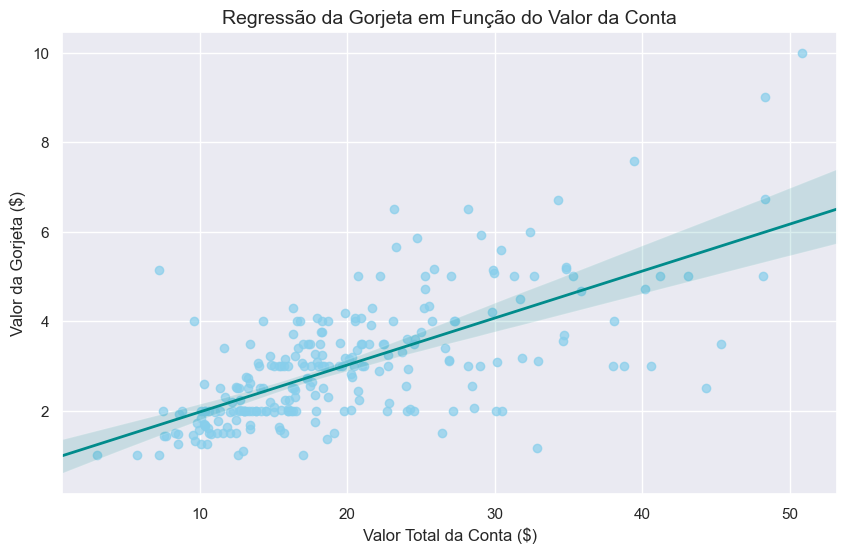

In [224]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))

cor_pontos = "skyblue"
cor_regressao = "darkcyan"
cor_ic = "lightcyan"

# Criar o gráfico de regressão com personalizações
sns.regplot(x="total_bill", y="tip", data=df, 
            scatter_kws={'color': cor_pontos, 'alpha': 0.7}, 
            line_kws={'color': cor_regressao, 'linewidth': 2},
            ci=95,  # Intervalo de confiança de 95%
            truncate=False)  # Extender a linha de regressão até os limites do eixo

# Adicionar títulos e rótulos
plt.title("Regressão da Gorjeta em Função do Valor da Conta", fontsize=14)
plt.xlabel("Valor Total da Conta ($)", fontsize=12)
plt.ylabel("Valor da Gorjeta ($)", fontsize=12)

# Mostrar o gráfico
plt.show()

O gráfico demonstra uma relação positiva entre o valor da conta e a gorjeta, com a gorjeta geralmente aumentando conforme a conta aumenta. O intervalo de confiança se alarga no topo da linha de regressão, indicando maior incerteza para contas mais altas, sugerindo que, embora haja relação positiva, outros fatores podem estar influenciando. Exploraremos gráficos de regressão condicionados a outras variáveis para entender como a relação entre valor da conta e gorjeta pode mudar.

### Valor da Conta e da Gorgeta e outras variáveis

Como a relação entre a gorjeta e o valor total da conta é afetada por uma terceira variável?

#### Como a quantidade de pessoas na mesa pode afetar o valor da Gorgeta?

/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x900 with 0 Axes>

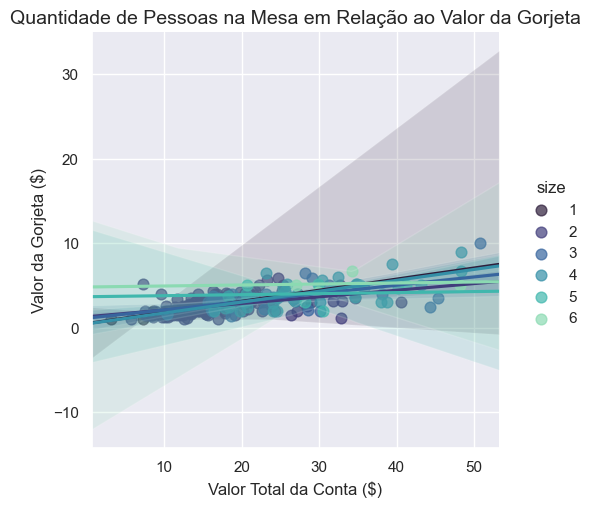

In [272]:
sns.set(style="darkgrid")


plt.figure(figsize=(15, 9))  
sns.lmplot(x="total_bill", y="tip", hue="size", data=df, palette="mako",
           scatter_kws={'s': 60, 'alpha': 0.7}, height=5, truncate=False)  

plt.title("Quantidade de Pessoas na Mesa em Relação ao Valor da Gorjeta", fontsize=14)
plt.xlabel("Valor Total da Conta ($)", fontsize=12)
plt.ylabel("Valor da Gorjeta ($)", fontsize=12)


plt.show()

#### Como o gênero de quem paga influencia no valor da Gorgeta?

/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

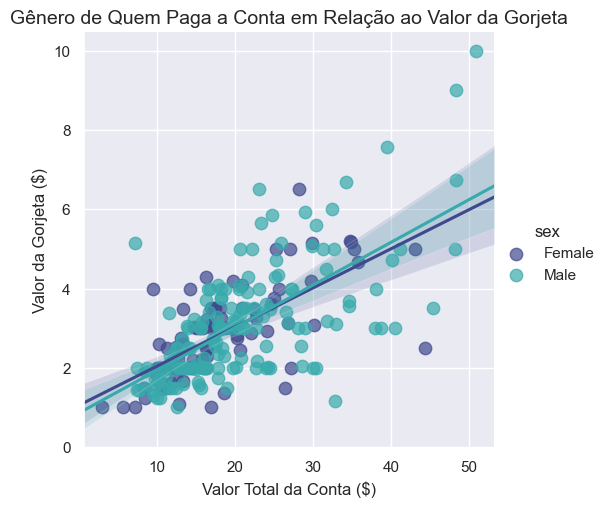

In [273]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))  
sns.lmplot(x="total_bill", y="tip", hue="sex", data=df, palette="mako",
           scatter_kws={'s': 80, 'alpha': 0.7}, height=5, truncate=False)  

plt.title("Gênero de Quem Paga a Conta em Relação ao Valor da Gorjeta", fontsize=14)
plt.xlabel("Valor Total da Conta ($)", fontsize=12)
plt.ylabel("Valor da Gorjeta ($)", fontsize=12)

plt.show()

#### Como ser fumante influencia no valor da Gorgeta?

/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

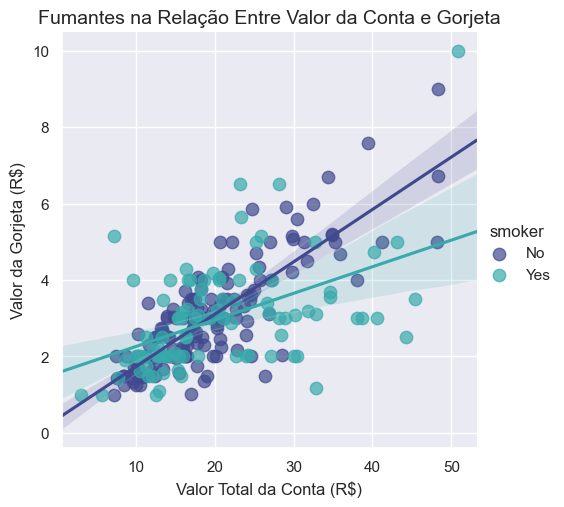

In [274]:

# Estilo visual
sns.set(style="darkgrid")

# Paleta de cores para fumantes/não fumantes
smoker_palette = {"Yes": "indianred", "No": "mediumseagreen"}  # Cores mais intuitivas e acessíveis

# Criar o gráfico lmplot com personalizações
plt.figure(figsize=(10, 6))  # Aumentar o tamanho da figura para melhor visualização
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df, palette="mako",
           scatter_kws={'s': 80, 'alpha': 0.7}, height=5, truncate=False)  # Marcadores maiores, com transparência e altura ajustada

# Títulos e rótulos dos eixos
plt.title("Fumantes na Relação Entre Valor da Conta e Gorjeta", fontsize=14)
plt.xlabel("Valor Total da Conta (R$)", fontsize=12)
plt.ylabel("Valor da Gorjeta (R$)", fontsize=12)

# Mostrar o gráfico
plt.show()

#### Dia da Semana e Hora da Refeição em Relação ao Valor da Gorjeta

/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


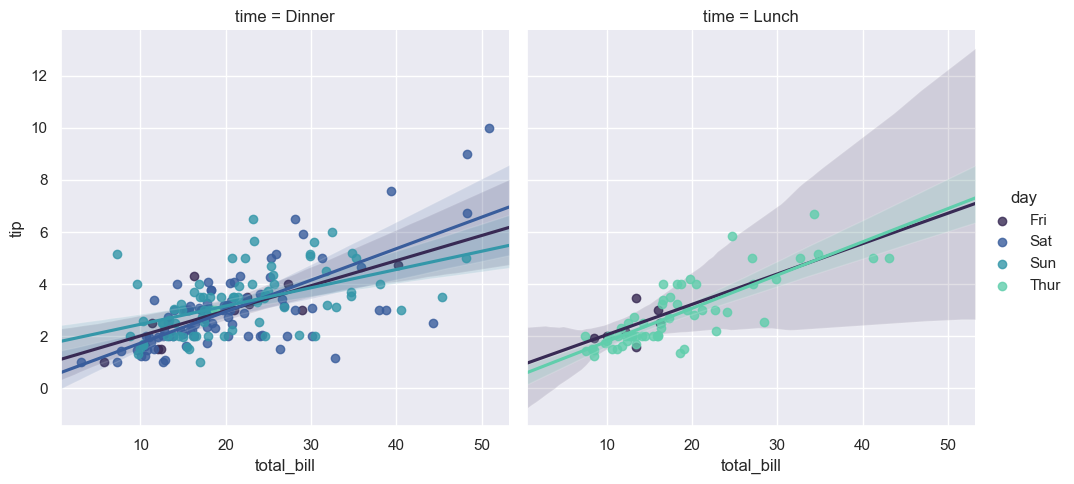

In [275]:
sns.set(style="darkgrid")
sns.lmplot(x='total_bill', y='tip', hue="day",col="time",data=df, palette="mako", truncate=False)
plt.show()

/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


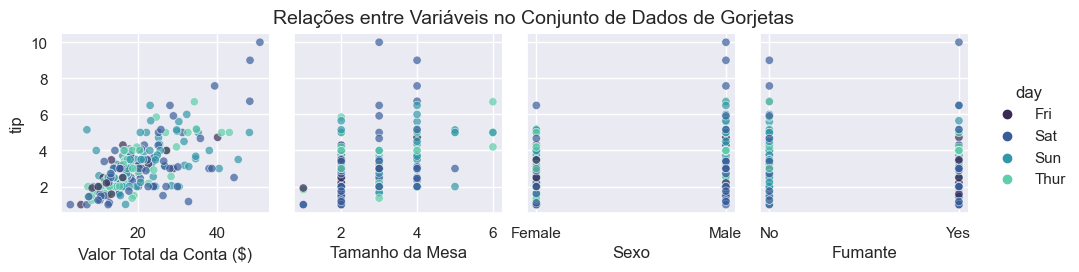

In [313]:
sns.set(style="darkgrid")


g = sns.pairplot(df, x_vars=["total_bill", "size", "sex", "smoker"], 
                 y_vars=["tip"], 
                 hue="day", 
                 palette="mako", 
                 diag_kind="kde", 
                 plot_kws=dict(alpha=0.7))


g.fig.suptitle("Relações entre Variáveis no Conjunto de Dados de Gorjetas", y=1.05, fontsize=14)
plt.subplots_adjust(top=0.95)


new_labels = {'total_bill': 'Valor Total da Conta ($)', 'size': 'Tamanho da Mesa', 'sex': 'Sexo', 'smoker': 'Fumante'}
for ax in g.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    if xlabel in new_labels:
        ax.set_xlabel(new_labels[xlabel])
    if ylabel in new_labels:
        ax.set_ylabel(new_labels[ylabel])
plt.show()

<a id="recap02"></a>
### Recapitulação

Nesta seção, exploramos a relação entre o valor da conta e a gorjeta por meio de gráficos de dispersão e estatísticas de covariância e correlação, confirmando uma relação linear positiva. Usamos regressão linear para modelar essa relação e prever gorjetas com base no valor da conta.

Exploramos esses fatores com gráficos de regressão condicionados a variáveis como tamanho da mesa e status de fumante.

Além disso, a taxa diminui com o aumento do tamanho do grupo, especialmente para fumantes.

O valor da gorjeta está relacionado ao valor da conta, mas a taxa de gorjeta parece diminuir com o aumento do valor da conta e do tamanho do grupo, principalmente para fumantes.

---

<a id="parte03"></a>
# 3. Investigação das relações entre todas as variáveis do conjunto de dados.

A parte 1 descreveu as variáveis do conjunto de dados de gorjetas com estatísticas e gráficos, explorando a distribuição de cada variável individualmente. A parte 2 analisou a relação entre o valor da conta e a gorjeta, incluindo a influência de outras variáveis. A parte 3 se concentra em relações multivariadas, especialmente entre sexo, fumante e tamanho da mesa, usando análises gráficas e não gráficas. 

<a id="genfum"></a>
### Gênero e fumante no conjunto de dados

O status de fumante parece influenciar a relação entre o valor da conta e a gorjeta, enquanto o sexo, isoladamente, não.

O gráfico mostra que a variabilidade das gorjetas é maior quando há fumantes, especialmente entre homens. Mulheres não fumantes apresentam a menor variabilidade. Há mais homens pagando a conta, e contas mais altas são geralmente pagas por eles, principalmente em mesas sem fumantes. As gorjetas de homens fumantes são inconsistentes, apesar dos valores das contas se concentrarem na média.



/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_38011/1876939990.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


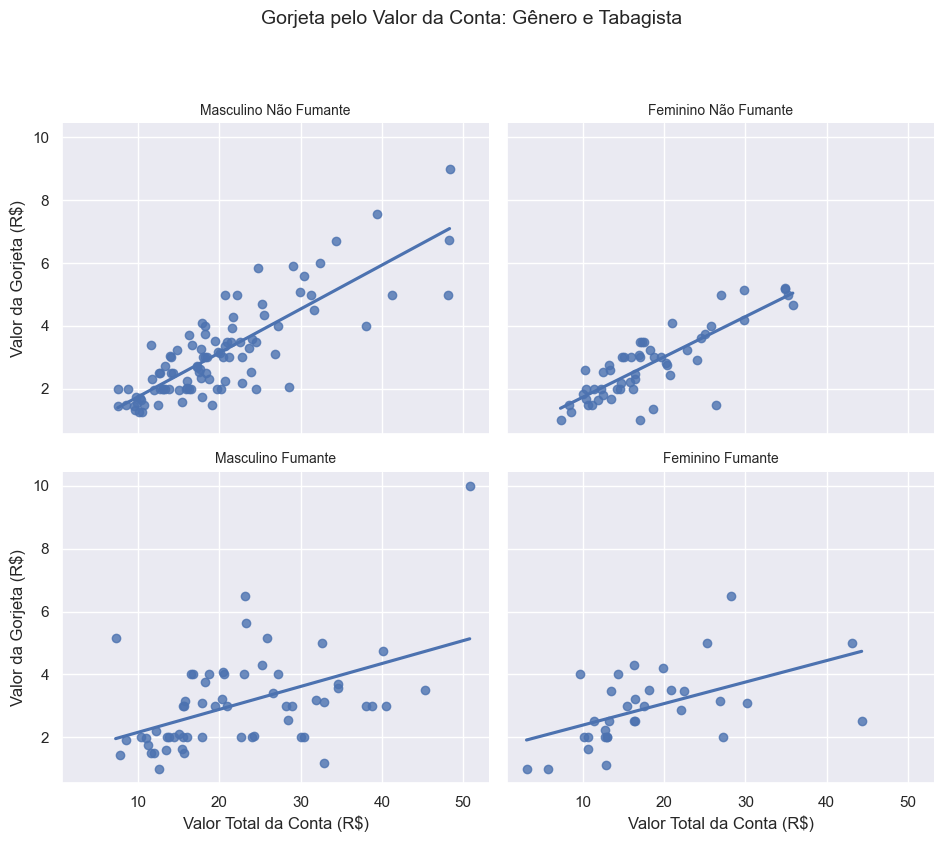

In [299]:
sns.set(style="darkgrid")

smoker_palette = {"Yes": "indianred", "No": "mediumseagreen"}

g = sns.lmplot(x="total_bill", y="tip", col="sex", row="smoker", 
                data=df, palette=smoker_palette,
                height=4, aspect=1.2, ci=None, 
                col_order=["Male", "Female"],  
                row_order=["No", "Yes"])       

g.fig.suptitle("Gorjeta pelo Valor da Conta: Gênero e Tabagista", fontsize=14, y=1.05)
g.set_axis_labels("Valor Total da Conta (R$)", "Valor da Gorjeta (R$)", fontsize=12)

for ax, title in zip(g.axes.flat, ['Masculino Não Fumante', 'Feminino Não Fumante', 'Masculino Fumante', 'Feminino Fumante']):
    ax.set_title(title, fontsize=10)  # Reduzir o tamanho da fonte para melhor ajuste

plt.tight_layout()

plt.show()

A parte 1 mostraram um número similar de homens e mulheres pagando a conta nos dias de semana, com mais homens nos fins de semana. Os boxplots revelaram que os gastos dos homens são mais variáveis e a conta média é geralmente maior, exceto aos sábados. A parte 2 indicou que o tamanho da mesa influencia a gorjeta.

O gráfico abaixo revela que os fins de semana foram os mais movimentados, com os sábados liderando para fumantes de ambos os sexos. A proporção de fumantes às sextas-feiras foi a mais alta, mas o número total de mesas atendidas foi pequeno. Há mais homens que mulheres no conjunto de dados, e mais mulheres não fumantes às quintas-feiras do que homens não fumantes.

Em resumo:

* Homens pagam mais contas nos fins de semana.
* Gastos de homens são mais variáveis.
* Sábados são os dias mais movimentados para fumantes.
* Proporção de fumantes é maior aos sábados.
* Há mais homens do que mulheres no conjunto de dados.
* Mais mulheres não fumantes às quintas-feiras.

/home/felinjob/.cache/pypoetry/virtualenvs/src-UDTeoO2z-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


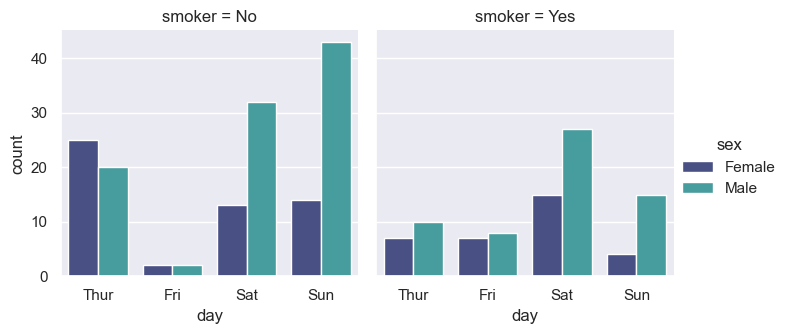

In [297]:
sns.set(style="darkgrid")

sns.catplot(x="day", kind="count", data=df, hue="sex", col="smoker", palette="mako", height=3.5, aspect =1, order=day_order)
plt.show()

<a id="quantpess"></a>
### A quantidade de pessoas tem influência?

Os pairplots da parte 1 mostraram as relações entre pares de variáveis no conjunto de dados. Eles revelaram que a maioria das mesas é para 2 pessoas, seguida por mesas para 3 e 4 pessoas. Há poucos clientes sozinhos e poucos grupos com mais de 4 pessoas. Os gráficos abaixo confirmam essa tendência. A porcentagem da gorjeta varia para todos os tamanhos de mesa, mas a distribuição é mais ampla para mesas de 2 pessoas e diminui com o aumento do tamanho da mesa, embora haja menos observações para mesas maiores.

Como visto na parte 2, o tamanho da mesa se correlaciona positivamente com o valor da conta e com o valor da gorjeta, mas a correlação com a gorjeta é menor. A gorjeta como porcentagem tem correlação negativa com o tamanho da mesa.

Em resumo:

* A maioria das mesas é para 2 pessoas.
* A porcentagem da gorjeta varia mais em mesas menores.
* O tamanho da mesa está positivamente relacionado com o valor da conta e da gorjeta.
* A porcentagem da gorjeta diminui com o aumento do tamanho da mesa.

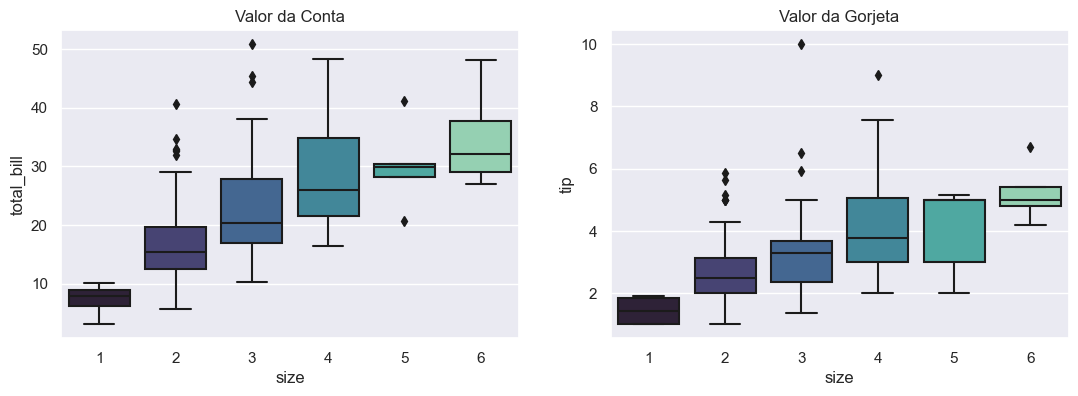

In [311]:

f, axes = plt.subplots(1, 2, sharey=False, figsize=(13, 4))
# boxplots of tips by party size
sns.boxplot(x="size", y="total_bill", data=df, ax=axes[0], palette="mako")
sns.boxplot(x="size", y="tip", data=df, ax=axes[1], palette="mako")
# set the ylimits to exclude the extreme outlier squashing the plot down

axes[0].set_title("Valor da Conta")
axes[1].set_title("Valor da Gorjeta");



<a id="conclusões"></a>
# Conclusões

A análise exploratória de dados do conjunto de dados "Tips" revelou insights sobre o comportamento de gorjetas em um restaurante.

1. **Descrição dos Dados:** O conjunto de dados abrangeu informações sobre gorjetas, valor da conta, sexo do cliente, hábito de fumar, dia da semana, horário da refeição e tamanho do grupo. A análise inicial destacou que a maioria dos clientes é do sexo masculino, não fumante e prefere jantar aos sábados.

2. **Análise da relação entre o valor total da conta e o valor da gorjeta através de regressão:** Uma análise mais aprofundada revelou uma correlação positiva entre o valor da conta e o valor da gorjeta, indicando que contas maiores geralmente resultam em gorjetas maiores. No entanto, essa relação não é perfeitamente linear e outros fatores também a influenciam.

3. **Investigação das relações entre todas as variáveis do conjunto de dados:** Ao investigar as relações entre as variáveis, o estudo descobriu que o tamanho da mesa e o status de fumante desempenham um papel na determinação do valor da gorjeta. A taxa de gorjeta tende a diminuir com o aumento do valor da conta e do tamanho do grupo, especialmente para fumantes.

**Respondendo às perguntas:**

* **O sexo de quem paga a conta tem influência no valor da gorjeta?** O sexo, por si só, não parece ter um impacto significativo, a menos que seja considerado em conjunto com outros fatores, como o hábito de fumar.

* **Existe relação entre o valor da conta e o da gorjeta?** Sim, há uma relação positiva entre o valor da conta e o valor da gorjeta.

* **Fumantes costumam dar gorjetas maiores?** Não há uma conclusão definitiva sobre se fumantes dão gorjetas maiores, mas a presença de fumantes em um grupo pode influenciar o valor da gorjeta.

* **O dia da semana ou o horário das refeições podem afetar o valor das gorjetas?** Sim, gorjetas tendem a ser mais generosas em relação ao valor da conta aos sábados, à medida que o valor da conta aumenta. Além disso, as pessoas parecem ser mais generosas com gorjetas em contas menores durante o jantar.

* **Mesas com mais pessoas costumam dar gorjetas maiores?** Sim, mesas maiores geralmente dão gorjetas maiores em termos absolutos, mas a taxa de gorjeta (porcentagem da conta) tende a diminuir à medida que o tamanho do grupo aumenta, especialmente para fumantes.

* **Qual o perfil dos clientes que frequentam o restaurante?** O restaurante atrai mais clientes do sexo masculino, especialmente nos fins de semana. A maioria dos clientes não fuma, e os grupos de duas pessoas são os mais comuns.

* **Quais os dias e horários com o maior número de clientes?** Os dias mais movimentados são sábados e domingos, com a maioria das refeições ocorrendo durante o jantar. As sextas-feiras são os dias mais tranquilos.

Em conclusão, a análise exploratória de dados do conjunto de dados "Tips" forneceu informações valiosas sobre os padrões de gorjetas em um restaurante. A análise revelou a influência de vários fatores, como valor da conta, tamanho da mesa e status de fumante, no valor das gorjetas. No entanto, devido às limitações do conjunto de dados, é importante ter cautela ao generalizar as conclusões para outros contextos.

<a id="referências"></a>
# Referências
- [Python Data Analysis Project For Beginners on Restaurant Data with Pandas and Seaborn Library](https://www.youtube.com/watch?v=nrLLw5nL_ck)
- [Data Analysis on Tips Dataset in 2 hours | Shambhavi Gupta | Fun with data science](https://www.youtube.com/watch?v=sQBrcK6MIa0&t=6026s)
- [Seaborn Tutorial in Python | Machine Learning Course](https://www.youtube.com/watch?v=FUzM6Fy1oIw&t=812s)
- [Seaborn Python Tutorial | Complete Seaborn Crash Course | Data Visualization in Seaborn | Kgp Talkie](https://www.youtube.com/watch?v=GcXcSZ0gQps&t=456s)
- [Seaborn Python Tutorial - Data Visualization Seaborn](https://www.youtube.com/watch?v=yqvPEh5Suw0)
- [Introduction to Box and Boxen Plots | Python Data Visualization Guide (Part 3)](https://www.youtube.com/watch?v=-6cSnHmRkiw)
- [DS - ML Tutorial 42. Data Visualization - Advanced Plotting with Seaborn Librar](https://www.youtube.com/watch?v=c1iWkbURX4w)
- [Data Visualization on Tips Dataset: DAY#7 of Machine Learning course from Novice to Pro](https://www.youtube.com/watch?v=Pm-fh_rkECk)
- [Seaborn Pairplot | Seaborn Jointplot | Visualization | Python | Seaborn | SuMyPyLab](https://www.youtube.com/watch?v=3Uwq0TB-AeM&t=1s)
- [Data Visualization using Python Seaborn | Data Science | Seaborn | Visualisation | SuMyPyLab](https://www.youtube.com/watch?v=WJ2ctnxvpps)
- [Explorando o Dataset tips do Seaborn no Python (CPyJN)](https://www.youtube.com/watch?v=mfFL0_sNVy0&t=66s)
- [Python Data Analysis Case Study | Analyzing Restaurant Tips Data in Python | [Pandas] [Seaborn]](https://www.youtube.com/watch?v=fJ82678KNCk&t=1555s)
- [Seaborn Tutorial : Seaborn Full Course](https://www.youtube.com/watch?v=6GUZXDef2U0&t)
- [Python for Data Science | Data Visualization Using Seaborn | Tips Dataset](https://www.youtube.com/watch?v=YWYKY1m2F6s)
- [seaborn tips miniProject](https://www.youtube.com/watch?v=JEj5IOx-KCo)
- [python data analysis tips sns jointplot how to change subplots in seaborn jointplot](https://www.youtube.com/watch?v=B00ZUuqxA0U&t)
- [Data Analysis Project Walkthrough - Create visualizations using Numpy, Pandas, Matplotlib](https://www.youtube.com/watch?v=BJF6l2SXFoI&t)
- [Python Seaborn Tutorial | Python Seaborn Plots | Python Seaborn Tutorial For Beginners | Simplilearn](https://www.youtube.com/watch?v=eG663qYKjVw&t)
- [Seaborn|Visualization in Python|Complete Seaborn Tutorial|Seaborn in less than 30 minutes|Learnerea](https://www.youtube.com/watch?v=cSZmd-kF1Yk&t)
- [Gráficos com Python usando Seabor](https://www.youtube.com/watch?v=N-S3cBEc96k&t)
- [Seaborn Data Visualization with Python | Project Tips Data set](https://www.youtube.com/watch?v=7Dsn0xas2mg)
- [Matplotlib Tutorial : Matplotlib Full Course](https://www.youtube.com/watch?v=wB9C0Mz9gSo&t)
- [Statistics Tutorial with Python](https://www.youtube.com/watch?v=YCPYNXtwKAc)
- [Wikipedia: Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)
- [Tidy Data by Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf)
- [Wikipedia: Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)
- [hacker earth blog post on regression analysis](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-guide-regression-analysis-plot-interpretations/tutorial/)
- [drawing from data](https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib)
- [tips dataset on Michael Waskon GitHub](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv.)
- [Project Jupyter](https://jupyter.org/)
- [seaborn.pydata.org](https://seaborn.pydata.org/)
- [seaborn](https://seaborn.pydata.org/introduction.html#introduction)
- [GitHub guides - Mastering Markdown](https://guides.github.com/features/mastering-markdown/)
- [Jupyter Notebook Tips, Tricks, and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)